[1623. 1612.]


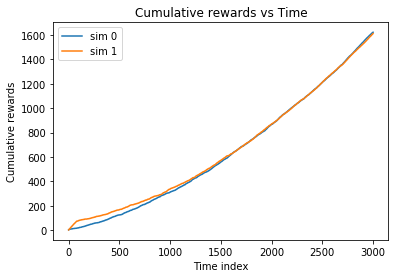

In [1]:
# 아래 코드를 기반으로 자유롭게 수정.
# reward_matrix 형태 수정 금지.
# 강화학습 관련 패키지, 라이브러리, 함수 사용 금지 (예. OpenAI Gym)

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#state = 0
class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return

    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self, Q, epsilon, state):
        direction = np.arange(N)
        # 행동을 결정
        if np.random.rand() < epsilon: # 확률 e로 무작위 행동을 선택함
            action = np.random.randint(3, size=(1))
        else:
            action = direction[np.argmax(Q[:,0])]
            #print(action)
        return action
    
    def get_s_next(self, state, action):
        direction = np.arange(N)
        next_direction = direction[action]  # 행동 a의 방향
        s_next = next_direction
        
        return s_next


def Q_learning(state, action, s_next, reward, Q, eta, gamma=1): # 이거 수정(action의 정보가 빠짐)
    if reward is 1:
        Q[state, 0] = Q[state, 0] + eta * (1 - Q[state, 0])
    else:
        Q[state, 0] = Q[state, 0] + eta * (0 + gamma + np.max(Q[s_next, 0]) - Q[state, 0])
    return Q


def test_algorithm(algo, reward_matrix, epsilon, eta):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    statelist = np.arange(N) # 초기상태 리스트
    
    for sim in range(num_sims):
        Q_metric = np.random.rand(N,T,num_sims) * reward_matrix * 0.1
        Q = Q_metric[:,0]
        state = statelist[0] # 초기상태 지정
        
        for t in range(T):
            chosen_ad = algo.select_ad(Q, epsilon, state) #액션            
            reward = reward_matrix[chosen_ad,t,sim] #보상 스칼라
            s_next = algo.get_s_next(state, chosen_ad) # 다음 상태 정보
            #print(reward_matrix[:,1,0].shape)
            #print(reward_matrix[:,1,0])
            
            Q = Q_learning(state, chosen_ad, s_next, reward, Q, eta) # 이 줄도 수정
            #print(Q)
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward

    return cumulative_rewards


# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
## 파라미터 수정
N = 3
T = 3000
num_sims = 2
epsilon = 0.3
eta = 1e-03

reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix, epsilon, eta)
print(results[:,T-1])


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

In [2]:
direction = np.arange(3)
print(direction)

[0 1 2]
